<a href="https://colab.research.google.com/github/EvertonVaz/Projetos_alura/blob/master/Forma%C3%A7%C3%A3o_Data_Science_Alura_An%C3%A1lise_explorat%C3%B3ria_do_MovieLens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

Everton Vaz

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [3]:
'''!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet'''

'!pip install pandas=="0.24.0" --quiet\n!pip install seaborn=="0.9.0" --quiet\n!pip install scipy=="1.2.0" --quiet'

In [3]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 1.0.5
Usando seaborn 0.10.1
Usando scipy 1.4.1


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [89]:
# solução
filmes = pd.read_csv('/content/drive/My Drive/formação alura/formacao-data-science-master/movies.csv')
filmes = filmes.rename(columns={'movieId': 'filmeId', 'title': 'titulo', 'genres': 'generos'}).set_index(['filmeId'])

In [90]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [6]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [93]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)

categorias = filmes['generos'].copy()

filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [94]:
# solução
notas = pd.read_csv('/content/drive/My Drive/formação alura/formacao-data-science-master/ratings.csv')
notas = notas.rename(columns={'userId': 'usuarioId', 'movieId': 'filmeId', 'rating': 'nota', 'timestamp': 'momento'}) #.set_index(['filmeId'])

In [95]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [96]:
# solução
nota_media = notas.groupby(['filmeId'])['nota'].mean()
filmes['nota_media'] = nota_media

In [97]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [98]:
# solução para calcular o total de votos por filme
votos = notas.groupby(['filmeId'])['nota'].count()
filmes['total_de_votos'] = votos


In [99]:
# solução para criar a nova coluna e filtrar os filmes
filmes = filmes[filmes['total_de_votos'] >= 50]
filmes.total_de_votos.min()

50.0

In [100]:
print(filmes.dtypes)
print(len(filmes))
filmes.head()

titulo                object
generos               object
ano_de_lancamento    float64
nota_media           float64
total_de_votos       float64
dtype: object
450


,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

In [101]:
def nomear_grafico(grafico, titulo, eixo_x, eixo_y=None):
  grafico.update_layout(title={'text': titulo,                                
                               'x':0.5,
                               'xanchor': 'center',
                               'yanchor': 'top'})
  grafico.update_xaxes(title_text=eixo_x)
  grafico.update_yaxes(title_text=eixo_y)

In [102]:
# solução histograma
import plotly.figure_factory as ff

x = filmes['nota_media']
hist_data = [x]
group_labels = ['Nota Média']

fig = ff.create_distplot(hist_data, group_labels, bin_size=0)

nomear_grafico(fig, 'Histograma da nota média', 'Nota Média')

fig.show()

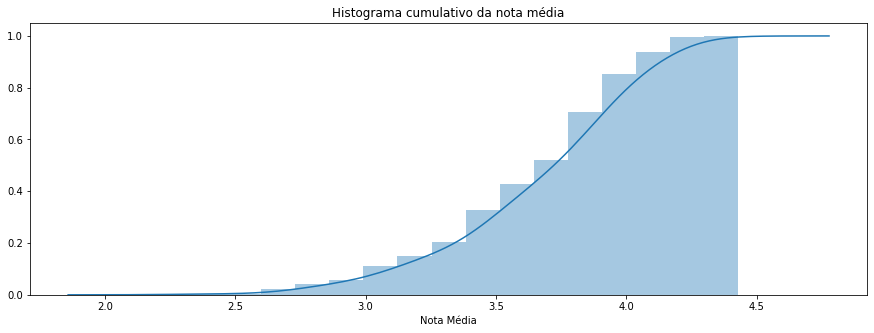

In [103]:
# solução cumulativa
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15,5)
args = {'cumulative': True}
ax = sns.distplot(filmes['nota_media'], hist_kws=args, kde_kws=args, axlabel='Nota Média')

ax.set_title('Histograma cumulativo da nota média');

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

In [104]:
# solução histograma
import plotly.express as px

labels = {'total_de_votos': 'Total de votos', 'count': 'Quantidade de filmes'}
hist = px.histogram(filmes, x=filmes['total_de_votos'])

nomear_grafico(hist, 'Total de votos x Quantidade de filmes', 'Total de votos', 'Quantidade de filmes')

hist.show()

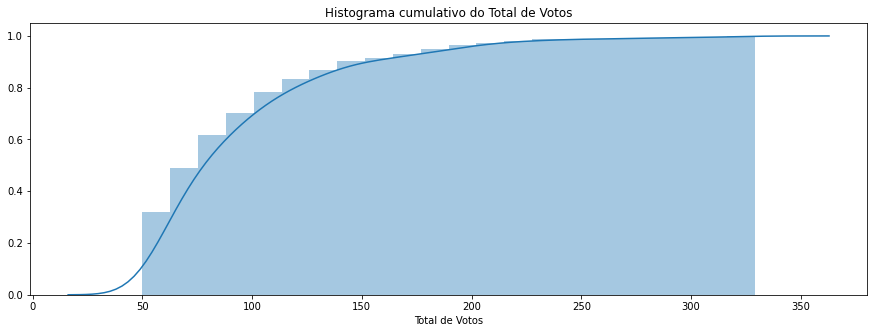

In [105]:
# solução cumulativa

ax = sns.distplot(filmes['total_de_votos'], hist_kws=args, kde_kws=args, axlabel='Total de Votos')

ax.set_title('Histograma cumulativo do Total de Votos');

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [106]:
# solução
nota_limite_dos_20_porcento = filmes['nota_media'].quantile(0.8).round(2)

In [107]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [108]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])


Temos 19 generos distintos


In [109]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

In [110]:
# solução

import plotly.graph_objects as go

quantidade_filmes_genero = generos.melt(var_name='Genero', value_name='Quantidade').groupby('Genero').sum()
f = go.Figure()
barras = f.add_trace(
    go.Bar(
        x=quantidade_filmes_genero.index,
        y=quantidade_filmes_genero['Quantidade'],
    ))

barras.update_layout(xaxis={'categoryorder':'total descending'})
nomear_grafico(barras, 'Quantidade de filmes por genero', 'Gerneros', 'Quantidade de filmes')
barras.show()

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [111]:
# solução
top5_generos_em_quantidade_de_filmes = quantidade_filmes_genero.sort_values(by='Quantidade', ascending=False)
top5_generos_em_quantidade_de_filmes = top5_generos_em_quantidade_de_filmes.iloc[:5]


In [112]:
print(top5_generos_em_quantidade_de_filmes)

           Quantidade
Genero               
Comedy            181
Drama             166
Action            164
Adventure         132
Thriller          121


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [113]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme = votos_por_genero_por_filme.melt(var_name='Genero', value_name='Quantidade').groupby('Genero').sum()
votos_por_genero_por_filme.head()

,Quantidade
Genero,
Action,15734.0
Adventure,13117.0
Animation,3066.0
Children,4331.0
Comedy,15330.0


In [114]:
# solucão
votos_por_genero_por_filme = votos_por_genero_por_filme.sort_values('Quantidade', ascending=False)
votos_por_genero_por_filme.head()

,Quantidade
Genero,
Action,15734.0
Drama,15445.0
Comedy,15330.0
Adventure,13117.0
Thriller,11907.0


In [115]:
# solução

votos_genero = go.Figure(
    go.Bar(
        x=votos_por_genero_por_filme.index,
        y=votos_por_genero_por_filme['Quantidade'],
    ))
nomear_grafico(votos_genero, 'Total de votos por genero', 'Generos', 'Total de votos')
votos_genero.show()

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [116]:
# solucao código
votos_por_filmes_por_genero = round(votos_por_genero_por_filme/quantidade_filmes_genero,2).sort_values('Quantidade', ascending=False)
votos_por_filmes_por_genero.head()

,Quantidade
Genero,
War,111.21
Crime,99.41
Adventure,99.37
Thriller,98.40
SciFi,97.71


In [117]:
# solução com visualização 
barras = go.Figure(
    go.Bar(
        x=votos_por_filmes_por_genero.index,
        y=votos_por_filmes_por_genero['Quantidade'],
        
    ))


nomear_grafico(barras, 'Quantidade de votos por filmes por genero', 'Generos', 'Filmes por genero')

barras.show()

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
    
O genero action possui muitos filmes em nossos dados, um total de 164 filmes e 15mil avaliações, o maior genero avaliado em nossos dados mas se fomos levar em consideração a quantidade de filmes pela quantidade de votos esse genero tem um total de 96 votos por filmes

war
O genero war possui apenas 19 filmes em nossos dados e 2113 votos na categoria, isso significa que as pessoas que assistem esse tipo de filme normalmente fazem suas avaliações
se nos dividirmos os 19 filmes pelos 2113 votos, teriamos 111 votos por filmes, é a maior quantidade de votos por filmes em nossos dados
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

In [118]:
# solução:
horror = filmes['total_de_votos'][filmes['Horror'] == 1]
adventure = filmes['total_de_votos'][filmes['Adventure'] == 1]

fig = go.Figure()
fig.add_trace(go.Box(y=horror, name='Horror'))
fig.add_trace(go.Box(y=adventure, name='Adventure'))

nomear_grafico(fig, 'boxplot dos generos horror e aventura', 'Generos', 'Votos')
fig.show()

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

In [119]:
fig = go.Figure()
for genero in generos.columns:
  df_genero = filmes['total_de_votos'][filmes[genero] == 1]
  fig.add_trace(go.Box(x=df_genero, name=genero))
  
nomear_grafico(fig,'boxplot de todos os generos', 'Total de votos', 'Generos')

fig.show()


## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
    
Avaliando o nosso grafico boxplot dos generos horror e aventura conseguimos ver que os filmes do genero aventura normalmente recebem mais avaliações, portanto comparando os dois generos eu indicaria um filme de aventura levando em consideração a quantidade de pessoas que avaliaram os dois generos


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

In [120]:
# solucao histograma de aventura
x = adventure
hist_data = [x]
group_labels = ['Total de Votos']

fig = ff.create_distplot(hist_data, group_labels, bin_size=0)

nomear_grafico(fig, 'Histogramas do genero Aventura', 'Votos')
fig.show()


In [121]:
# solucao histograma de horror
x = horror
hist_data = [x]
group_labels = ['Total de Votos']

fig = ff.create_distplot(hist_data, group_labels, bin_size=0)

nomear_grafico(fig, 'Histogramas do genero Horror', 'Votos')
fig.show()


In [122]:
from scipy.stats import normaltest
import scipy.stats as sct

In [123]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
significancia = 0.05
media_filmes = round(filmes['total_de_votos'].mean(),2)


stat, p = sct.ttest_1samp(adventure, popmean=media_filmes)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(2)))
print(f'''Com a informação do p_valor podemos rejeitar a hipotese nula? 
{"sim" if p < significancia else "não"} pois o p_valor é {"menor" if p < significancia else "maior"} que o valor 
estabelecido anteriormente para p, que seria 0.05''')

Estatística de teste: 1.82
p-valor: 0.07
Com a informação do p_valor podemos rejeitar a hipotese nula? 
não pois o p_valor é maior que o valor 
estabelecido anteriormente para p, que seria 0.05


In [124]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
significancia = 0.05
media_filmes = round(filmes['total_de_votos'].mean(),2)

stat, p = sct.ttest_1samp(horror, popmean=media_filmes)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(2)))
print(f'''Com a informação do p_valor podemos rejeitar a hipotese nula? 
{"sim" if p < significancia else "não"} pois o p_valor é {"menor" if p < significancia else "maior"} que o valor 
estabelecido anteriormente para p, que seria 0.05''')

Estatística de teste: -0.67
p-valor: 0.51
Com a informação do p_valor podemos rejeitar a hipotese nula? 
não pois o p_valor é maior que o valor 
estabelecido anteriormente para p, que seria 0.05


In [125]:
# solução com o teste desejado


### Solução (explique sua conclusão):
Com essas informações chego a conclusão final que um filme de aventura pode atingir um publico maior que um filme de horror
Por isso acredito que fazendo um filme de aventura você conseguirar gerar mais receitas que um filme de horror


## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

In [126]:
# solução:
horror = filmes['nota_media'][filmes['Horror'] == 1]
adventure = filmes['nota_media'][filmes['Adventure'] == 1]

fig = go.Figure()
fig.add_trace(go.Box(y=horror, name='Horror'))
fig.add_trace(go.Box(y=adventure, name='Adventure'))

nomear_grafico(fig, 'boxplot dos generos horror e aventura', 'Generos', 'Média dos votos')
fig.show()

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:

As notas dos filmes estão bem parecidas, conseguimos visualizar que os dois filmes tem 25% das notas acima de 3.9
A maior nota fica com o genero aventura que é 4.2, sendo assim minha decisão seria ainda o genero aventura


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

In [127]:
# solucao histograma de aventura

x = adventure
hist_data = [x]
group_labels = ['Total de Votos']

fig = ff.create_distplot(hist_data, group_labels, bin_size=0)

nomear_grafico(fig, 'Histogramas do genero Aventura', 'Votos')
fig.show()


In [128]:
# solucao histograma de horror

x = horror
hist_data = [x]
group_labels = ['Total de Votos']

fig = ff.create_distplot(hist_data, group_labels, bin_size=0)

nomear_grafico(fig, 'Histogramas do genero Horror', 'Votos')
fig.show()


In [129]:
print(round(horror.mean(), 2))
print(round(adventure.mean(), 2))
print(media_filmes)

3.61
3.62
91.91


In [130]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
# Genero Adventure
p_valor = 0.05
media_filmes = round(filmes['nota_media'].mean(),2)


stat, p = sct.ttest_1samp(adventure, popmean=media_filmes)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(2)))
print(f'''Com a informação do p_valor podemos rejeitar a hipotese nula? 
{"sim" if p < significancia else "não"} pois o p_valor é {"menor" if p < significancia else "maior"} que o valor 
estabelecido anteriormente para p, que seria 0.05''')

Estatística de teste: -1.31
p-valor: 0.19
Com a informação do p_valor podemos rejeitar a hipotese nula? 
não pois o p_valor é maior que o valor 
estabelecido anteriormente para p, que seria 0.05


In [131]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
# Genero Horror
p_valor = 0.05
media_filmes = round(filmes['nota_media'].mean(),2)


stat, p = sct.ttest_1samp(horror, popmean=media_filmes)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(2)))
print(f'''Com a informação do p_valor podemos rejeitar a hipotese nula? 
{"sim" if p < significancia else "não"} pois o p_valor é {"menor" if p < significancia else "maior"} que o valor 
estabelecido anteriormente para p, que seria 0.05''')

Estatística de teste: -0.6
p-valor: 0.55
Com a informação do p_valor podemos rejeitar a hipotese nula? 
não pois o p_valor é maior que o valor 
estabelecido anteriormente para p, que seria 0.05


In [132]:
# solução com o teste desejado


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:
Continuo com a mesma recomendação por conseguir entender que a nota média das avaliações do genero aventura é maior que a nota média do genero horror

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:
Com as informações adquiridas nessas analises realizadas a pouco, eu recomendo o genero Aventura



## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [133]:
top_2_generos = list(votos_por_genero_por_filme.iloc[0:2].index)

top5_filmes = filmes[['titulo', 'nota_media', top_2_generos[0], top_2_generos[1]]
                    ][(filmes[top_2_generos[0]] == 1) | (filmes[top_2_generos[1]] == 1)
                     ].sort_values('nota_media', ascending=False).head()
        

In [134]:
# solução: calculando os 2 generos mais votados
top_2_generos

['Action', 'Drama']

In [135]:
# solução: encontrando os top 5 filmes desses generos
top5_filmes

,titulo,nota_media,Action,Drama
filmeId,,,,
318,"Shawshank Redemption, The (1994)",4.429022,0,1
858,"Godfather, The (1972)",4.289062,0,1
2959,Fight Club (1999),4.272936,1,1
1276,Cool Hand Luke (1967),4.271930,0,1
1221,"Godfather: Part II, The (1974)",4.259690,0,1


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [136]:
correlacao = filmes.drop(columns=['ano_de_lancamento']).corr()
correlacao.style.format("{:.2f}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)


,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
nota_media,1.00,0.34,-0.15,-0.08,0.04,-0.03,-0.26,0.19,-0.00,0.28,-0.02,0.08,-0.03,0.06,-0.01,0.13,-0.07,-0.14,-0.02,0.13,-0.06
total_de_votos,0.34,1.00,0.07,0.10,0.02,0.00,-0.13,0.08,-0.06,0.02,-0.01,-0.04,-0.04,-0.02,-0.02,-0.01,-0.05,0.06,0.09,0.09,-0.06
Action,-0.15,0.07,1.00,0.33,-0.17,-0.21,-0.29,0.06,-0.05,-0.25,-0.12,-0.02,-0.01,0.13,-0.15,-0.06,-0.20,0.33,0.31,0.07,0.05
Adventure,-0.08,0.10,0.33,1.00,0.16,0.18,-0.09,-0.24,-0.04,-0.29,0.24,-0.06,-0.10,0.22,-0.05,-0.09,-0.17,0.28,-0.01,-0.09,0.04
Animation,0.04,0.02,-0.17,0.16,1.00,0.75,0.13,-0.09,-0.02,-0.12,0.23,-0.03,-0.07,0.11,0.43,-0.05,0.02,-0.10,-0.17,-0.06,-0.05
Children,-0.03,0.00,-0.21,0.18,0.75,1.00,0.12,-0.13,-0.02,-0.13,0.37,-0.03,-0.08,0.09,0.41,-0.08,-0.02,-0.10,-0.21,-0.07,-0.06
Comedy,-0.26,-0.13,-0.29,-0.09,0.13,0.12,1.00,-0.13,0.01,-0.29,0.10,-0.08,-0.03,-0.16,0.05,-0.20,0.23,-0.21,-0.36,-0.08,0.00
Crime,0.19,0.08,0.06,-0.24,-0.09,-0.13,-0.13,1.00,-0.03,0.09,-0.16,0.19,-0.05,-0.03,-0.11,0.11,-0.21,-0.18,0.25,-0.07,-0.08
Documentary,-0.00,-0.06,-0.05,-0.04,-0.02,-0.02,0.01,-0.03,1.00,0.02,-0.03,-0.01,-0.02,-0.02,-0.01,-0.02,-0.03,-0.03,-0.04,-0.01,-0.01
Drama,0.28,0.02,-0.25,-0.29,-0.12,-0.13,-0.29,0.09,0.02,1.00,-0.12,-0.02,-0.11,-0.08,-0.08,0.02,0.07,-0.16,-0.04,0.21,-0.01


In [137]:
# solucao
'''nota_media_por_genero = pd.DataFrame((generos.values.T * filmes['nota_media'].values).T, columns = generos.columns)
nota_media_por_genero = nota_media_por_genero.melt(var_name='Genero', value_name='nota_media')
nota_media_por_genero = nota_media_por_genero[nota_media_por_genero['nota_media'] > 0].groupby('Genero').mean()
nota_media_por_genero'''
correlacao['nota_media'].sort_values().iloc[[0,1,-3,-4]]

Comedy   -0.256005
Action   -0.154089
Drama     0.277662
Crime     0.190220
Name: nota_media, dtype: float64

## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [138]:
# solucao
correlacao['total_de_votos'].sort_values().iloc[[0,1,-3,-4]]



Comedy      -0.128527
Western     -0.060789
Adventure    0.104380
War          0.087999
Name: total_de_votos, dtype: float64

## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

In [139]:
import plotly
print("Usando plotly %s" % plotly.__version__)
pd.options.plotting.backend = "plotly"

Usando plotly 4.8.2


In [140]:
# solucao
fig = filmes.groupby(['ano_de_lancamento'])['nota_media'].mean().plot()
nomear_grafico(fig, 'Nota media por ano', 'Ano de lançamento', 'Nota Média')
fig.show()

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [141]:
# solução (código)
filmes[['ano_de_lancamento', 'nota_media']].corr()['nota_media'].iloc[0]

-0.1591455520444448

### Solução (explicação)
Segundo a correlação e o grafico as pessoas avaliaram melhor os filmes mais antigos


## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

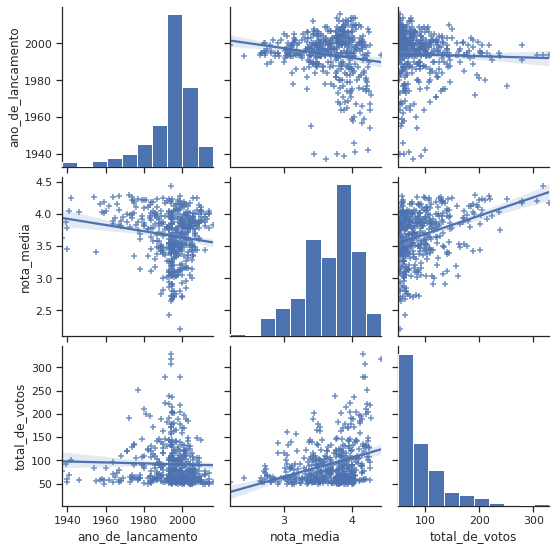

In [162]:
# solução
infos = filmes[['ano_de_lancamento', 'nota_media', 'total_de_votos']]
sns.pairplot(infos, kind="reg", markers='+')


## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

In [ ]:
import numpy as np

filmes['categorias'] = np.where(filmes['Animation'] == 1, 'Animação', 'Outros filmes')
filmes

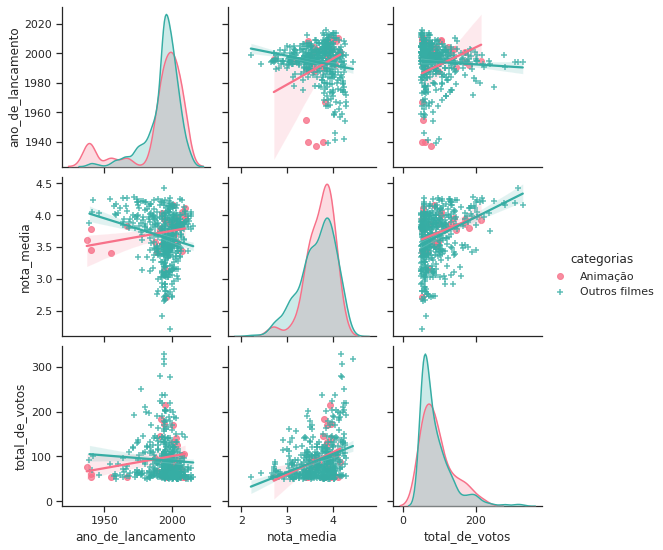

In [211]:
sns.pairplot(filmes, vars=['ano_de_lancamento', 'nota_media', 'total_de_votos'],  kind='reg', hue='categorias', palette="husl",markers=["o", "+"])


## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:
A nota média do genero de animação vem crescendo conforme os anos vão passando, mesmo ela sendo baixa, ela é linear!
O publico que interage com esse mesmo genero tambem vem crescendo ao longo do tempo como podemos ver a relação no grafico
Já os outros filmes é ao contrario, conforme os anos passam tanto a média quanto os votos vem caindo


## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

In [ ]:
# solução

In [224]:
filmes[['titulo', 'ano_de_lancamento',	'nota_media',	'total_de_votos']]
lanc_por_ano = filmes.groupby(['ano_de_lancamento']).count()['titulo'].plot()
nomear_grafico(lanc_por_ano, 'Lançamento de filmes por ano', 'Anos', 'Quantidade de filmes')

lanc_por_ano.show()

In [231]:
quantidade_filmes_por_ano = filmes.groupby(['ano_de_lancamento'])['titulo'].count()
quantidade_filmes_por_ano.head()

ano_de_lancamento
1937.0    1
1939.0    1
1940.0    2
1941.0    1
1942.0    1
Name: titulo, dtype: int64

In [230]:
total_de_votos_por_ano = filmes.groupby(['ano_de_lancamento'])['total_de_votos'].sum()
total_de_votos_por_ano.head()

ano_de_lancamento
1937.0     77.0
1939.0     92.0
1940.0    113.0
1941.0     69.0
1942.0    100.0
Name: total_de_votos, dtype: float64

In [236]:
qtd_filmes_por_total_votos = total_de_votos_por_ano / quantidade_filmes_por_ano 
fig = qtd_filmes_por_total_votos.plot()

nomear_grafico(fig, 'Quantidade de filmes por total de votos', 'Anos', 'Total de votos x Total filmes')

fig.show()